In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=4c0bfd2f90d35a4b0a2f88a95d06e8528e9b5a5d3260f9955f12318ca66d6ca1
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uni

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [ ]:
# URL del dataset original
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Leer el dataset
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Procesar el dataset
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Crear un DataFrame con las columnas originales
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=columns)
df['MEDV'] = target

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
df['safe'] = np.where(df['CRIM'] > np.median(df['CRIM']), 1, 0)
df.info()
df['safe'].value_counts(normalize = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  safe     506 non-null    int64  
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


,proportion
safe,
0,0.5
1,0.5


In [ ]:
sns.pairplot(data = df, hue = 'safe')

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

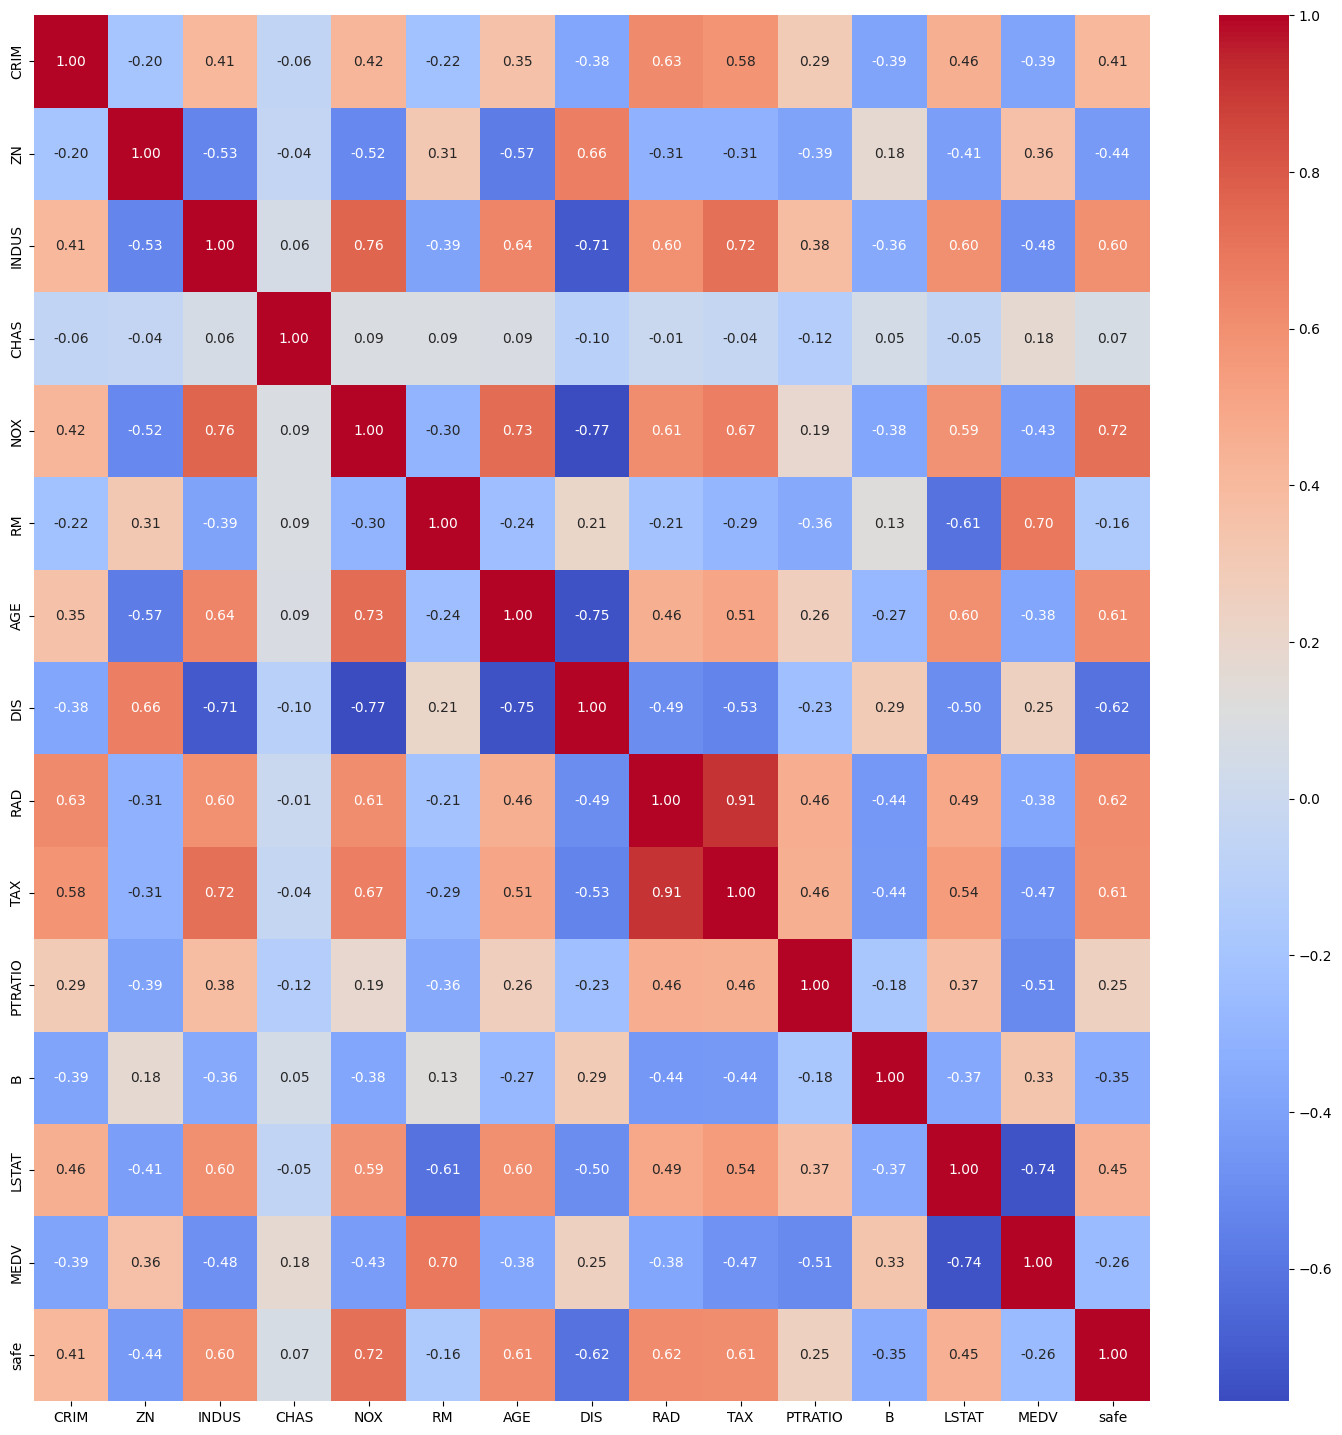

In [ ]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, fmt = '2.2f', cmap = 'coolwarm')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
from sklearn.preprocessing import StandardScaler
y = df['safe']
X = df.drop(['safe', 'CRIM', 'TAX', 'AGE', 'CHAS', 'INDUS', 'RM', 'PTRATIO', 'LSTAT', 'B', 'DIS'], axis = 1)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 2025)

std = StandardScaler(with_mean=True, copy = True, with_std = True)
for col in X.columns:
    X_train[col] = std.fit_transform(X_train[[col]])
    X_test[col] = std.transform(X_test[[col]])




In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def cm(conf_matrix):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


def cr(report):
    print("Clasification Report:")
    report_df = pd.DataFrame(report).transpose()
    print(report_df)

def results_model(model, islogreg=False):
    if islogreg:
        model_probs = model.predict(X_test)
        model_preds = (model_probs > 0.5).astype(int)
    else:
        model_preds = model.predict(X_test)

    confusion_matriz = confusion_matrix(y_test, model_preds)
    cm(confusion_matriz)
    print('\nReport')
    report = classification_report(y_test, model_preds, target_names=['0', '1'], output_dict=True)
    cr(report)

    return model_preds




In [ ]:
logistic_model = sm.GLM(y_train, X_train, family = sm.families.Binomial()).fit()
summarize(logistic_model)

,coef,std err,z,P>|z|
ZN,-2.0854,0.547,-3.811,0.000
NOX,2.5660,0.387,6.626,0.000
RAD,1.5583,0.385,4.043,0.000
MEDV,0.6673,0.209,3.186,0.001


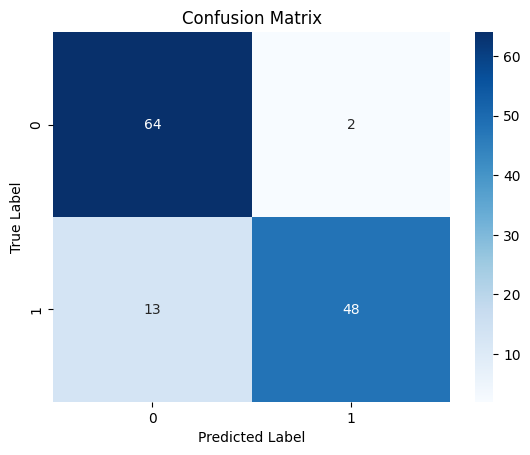


Report
Clasification Report:
              precision    recall  f1-score    support
0              0.831169  0.969697  0.895105   66.00000
1              0.960000  0.786885  0.864865   61.00000
accuracy       0.881890  0.881890  0.881890    0.88189
macro avg      0.895584  0.878291  0.879985  127.00000
weighted avg   0.893048  0.881890  0.880580  127.00000
The error obtenied on test is : 11.8110 %


In [ ]:
model_preds = results_model(logistic_model, True)
test_error = (1 - (accuracy_score(y_test, model_preds))) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

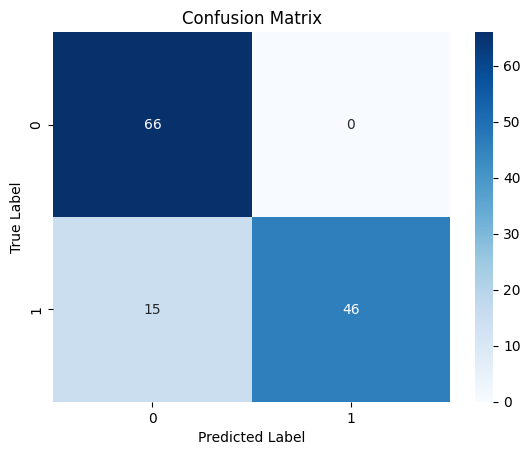


Report
Clasification Report:
              precision    recall  f1-score    support
0              0.814815  1.000000  0.897959   66.00000
1              1.000000  0.754098  0.859813   61.00000
accuracy       0.881890  0.881890  0.881890    0.88189
macro avg      0.907407  0.877049  0.878886  127.00000
weighted avg   0.903762  0.881890  0.879637  127.00000
The error obtenied on test is : 11.8110 %


In [ ]:
lda = LDA()
model_lda = lda.fit(X_train, y_train)
model_preds = results_model(model_lda)
test_error = (1 - (accuracy_score(y_test, model_preds))) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

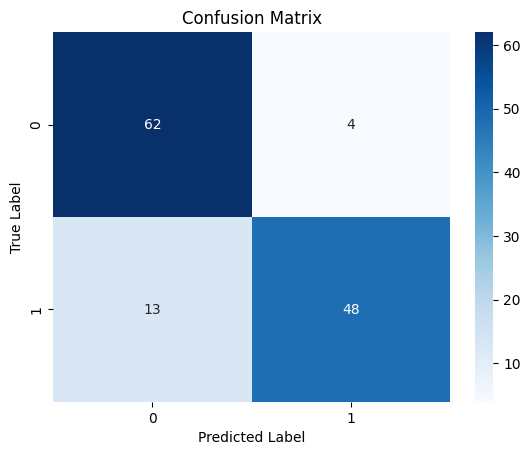


Report
Clasification Report:
              precision    recall  f1-score     support
0              0.826667  0.939394  0.879433   66.000000
1              0.923077  0.786885  0.849558   61.000000
accuracy       0.866142  0.866142  0.866142    0.866142
macro avg      0.874872  0.863140  0.864495  127.000000
weighted avg   0.872974  0.866142  0.865083  127.000000
The error obtenied on test is : 13.3858 %


In [ ]:
qda = QDA()
model_qda = qda.fit(X_train, y_train)
model_preds = results_model(model_qda)
test_error = (1 - (accuracy_score(y_test, model_preds))) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

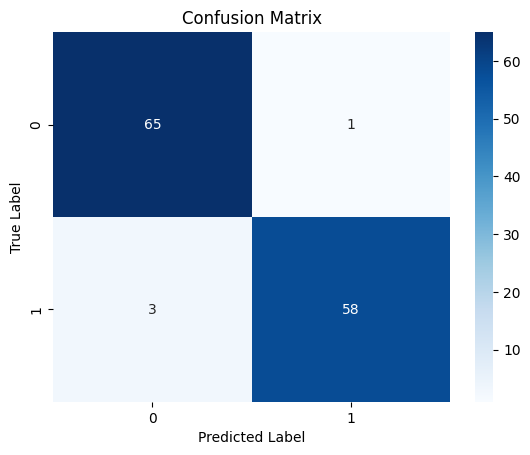


Report
Clasification Report:
              precision    recall  f1-score     support
0              0.955882  0.984848  0.970149   66.000000
1              0.983051  0.950820  0.966667   61.000000
accuracy       0.968504  0.968504  0.968504    0.968504
macro avg      0.969467  0.967834  0.968408  127.000000
weighted avg   0.968932  0.968504  0.968477  127.000000
The error obtenied on test is : 3.1496 %


In [ ]:
'''
for k in range(1, 11):
    print(f'for k: {k}')
    knn = KNeighborsClassifier(n_neighbors=k)
    model_knn = knn.fit(X_train, y_train)
    model_preds = results_model(model_knn)
    test_error = (1 - (accuracy_score(y_test, model_preds))) * 100
    print(f'The error obtenied on test is : {test_error:.4f} %')
    print('\n')
    print('\n')
'''
knn = KNeighborsClassifier(n_neighbors=2)
model_knn = knn.fit(X_train, y_train)
model_preds = results_model(model_knn)
test_error = (1 - (accuracy_score(y_test, model_preds))) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

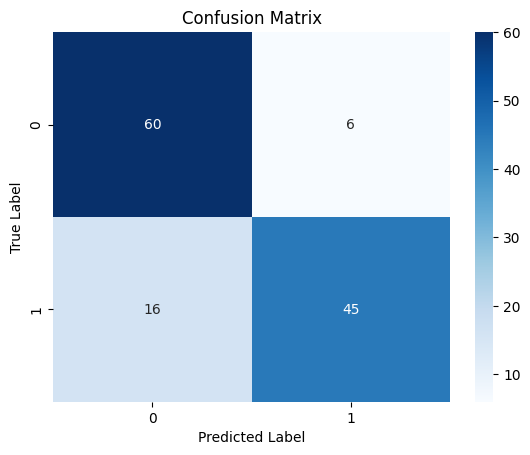


Report
Clasification Report:
              precision    recall  f1-score     support
0              0.789474  0.909091  0.845070   66.000000
1              0.882353  0.737705  0.803571   61.000000
accuracy       0.826772  0.826772  0.826772    0.826772
macro avg      0.835913  0.823398  0.824321  127.000000
weighted avg   0.834085  0.826772  0.825138  127.000000
The error obtenied on test is : 17.3228 %


In [ ]:
nb = GaussianNB()
model_nb = nb.fit(X_train, y_train)
model_preds = results_model(model_nb)
test_error = (1 - (accuracy_score(y_test, model_preds))) * 100
print(f'The error obtenied on test is : {test_error:.4f} %')

Conclusion: The supirior model for this task in the first iteration is the KNN-7 with a really good score of 7.0866. Lets iterate more and try to achieve a better performance.

On other iterations we were able to achieve 3.1496 %  error test with a knn-2. This model was the best in every iteration.